In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import random
from scipy.special import comb
import scipy as sp

sns.set(style='ticks', color_codes = True)


import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv(os.path.join('data', 'StudentsPerformance.csv'))
df.shape

(1000, 8)

In [2]:
# 모평균 ? 1000개에 대한 평균
df['math score'].mean()

66.089

In [3]:
sample_df = df['math score'].sample(50)
sample_mean = sample_df.mean()
sample_std = sample_df.std()

sample_mean, sample_std

(64.88, 15.0069915678782)

In [5]:
# sample mean 으로 df mean을 추정해야 함
# 95%의 신뢰구간 > 정규분포로 가정했을 때의 얘기 
# 1.96 > 정규분포에서의 양 끝단(?)

sample_mean - 1.96 * sample_std, sample_mean + 1.96 * sample_std # 95%의 신뢰구간

(35.46629652695872, 94.29370347304126)

In [6]:
sp.stats.norm.interval(alpha=0.95, loc = sample_mean, scale = sample_std)

(35.466837010662445, 94.29316298933755)

In [8]:
num_of_samples = 800 # 800번을 뽑는데 
sample_rangs = list()

for idx in range(num_of_samples):
    sample_df = df['math score'].sample(10) # 10개 씩 추출하면서 
    sample_mean = sample_df.mean()
    sample_std = sample_df.std()
    
    lower_value, higher_value = sample_df.min(), sample_df.max() # 구간을 위해 최소 최댓값을 구하고
    value_range = np.linspace(lower_value, higher_value, num = 100)
    sample_rangs.append(value_range)

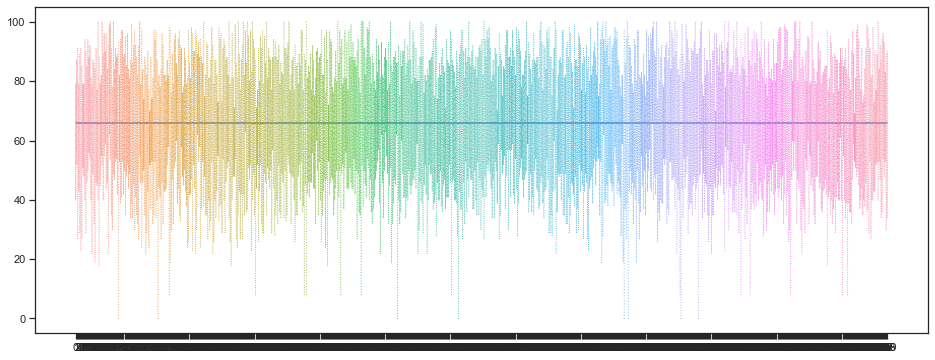

In [9]:
ax = plt.figure(figsize=(16, 6))
sns.stripplot(data = sample_rangs, size = 1)
plt.plot(range(num_of_samples), [df['math score'].mean()] * num_of_samples, )

In [12]:
from tqdm.notebook import tqdm

In [13]:
num_of_samples = 200000
sample_rangs = [True for _ in range(num_of_samples)]

for idx in tqdm(range(num_of_samples)):
    sample_df = df['math score'].sample(10)
    sample_mean = sample_df.mean()
    sample_std = sample_df.std()
    
    lower_value, higher_value = sample_df.min(), sample_df.max() 
    # 평균값이 lower 나 higher 안에 없으면 ?
    if (lower_value > df['math score'].mean()) or (higher_value < df['math score'].max()):
        sample_rangs[idx] = False

  0%|          | 0/200000 [00:00<?, ?it/s]

In [15]:
# 표본 추출 시 모평균의 값에 포함되지 않는 부분이 존재한다!
len(sample_rangs), sum(sample_rangs)

(200000, 13422)